# Lesson 2: Word Embeddings or how to make sense of
$$ King - Man + Woman \approx Queen $$

In this lesson, the goal is to make use of a miraculous algorithm called Word2vec which embeds words in a Euclidean space of large dimension. We will use an opensource framework called Gensim (https://radimrehurek.com/gensim)

For installing the package
https://radimrehurek.com/gensim/install.html


## I. Loading text corpus and training a model for word embeddings

For reference, here are a few useful links: 
- https://github.com/RaRe-Technologies/gensim-data
- https://rare-technologies.com/new-download-api-for-pretrained-nlp-models-and-datasets-in-gensim/

This is a very computationally expensive task. Most of the easily available datasets are rather small, and models trained from them are not very efficient. Powerful models are difficult to train, with datasets so large it is actually hard to get your hands on them.

An industrial-grade example: Google's Word2Vec (https://code.google.com/archive/p/word2vec/). In this freely-available model, the vectors were trained on part of Google News dataset (about 100 billion words). The model contains 300-dimensional vectors for 3 million words and phrases.
The final model is 1.6 GB

Therefore, for the purposes of a lesson, loading pre-trained models is a much more sensible choice.

## II. Loading a pre-trained model

In [1]:
from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

# Pretrained models available with gensim
#
# Remark: Since fetching takes time, the model is saved there for future use.
#         None is the default value for a model that has not been loaded
models = {"glove-wiki-gigaword-50" : None,   # 66 MB
          "glove-wiki-gigaword-100": None,   # 128 MB
          "glove-wiki-gigaword-200": None,   # 252 MB
          "glove-twitter-25" : None,   # 104 MB
          "glove-twitter-50" : None,   # 199 MB
          "glove-twitter-100": None,  # 387 MB
         }
modelName = ''

from gensim.models.word2vec import Word2Vec
import gensim.downloader as api
def modelSelection(choice):
    global modelName
    global models
    modelName = choice
    if models[modelName] is not None:
        return
    #
    info = api.info()
    print("Downloading the pre-trained model '%s'..."%modelName)
    models[modelName] = api.load(modelName)  # download the pre-trained model and return it opened as an iterable
    print("Ok")
    return

interact(modelSelection, choice=models.keys() );

interactive(children=(Dropdown(description='choice', options=('glove-wiki-gigaword-50', 'glove-wiki-gigaword-1…

In [4]:
# The model is a dictionary mapping words to vectors, called word vectors.
# The underlying space is called a "space of features".
model = models[modelName]
v = model["cow"]
print("Type of word vectors:", type(v))
print("Dimension:", v.shape)
print("An example: ", v)

Type of word vectors: <class 'numpy.ndarray'>
Dimension: (50,)
An example:  [ 0.61253  -0.48167  -0.74199  -0.55203  -0.007596  1.6101   -0.88565
 -0.81981   1.5144   -0.22804   0.55367  -0.18392   0.7049   -0.36931
  1.0668    1.1077    0.19709   0.24731  -0.68395   0.5475   -0.038255
 -0.78989   0.61131   0.31473   0.50215  -1.6535   -0.42782   1.0404
  0.29429  -0.36889   1.3148   -0.18443   0.092753  0.77572  -0.54845
 -0.14645   0.51128   0.047248  0.41781  -0.18324  -0.44197  -0.25237
 -0.3359    0.3096    1.9192    0.3396   -0.27341  -0.01316   0.64974
 -0.85857 ]


In [5]:
# Examples of cosine similarity
print("Examples of similarity:")
model.similar_by_vector(v)

Examples of similarity:


[('cow', 1.0),
 ('pig', 0.8290976881980896),
 ('cows', 0.8151975870132446),
 ('sheep', 0.8077231049537659),
 ('bovine', 0.801677942276001),
 ('cattle', 0.7895811200141907),
 ('pigs', 0.7748671770095825),
 ('mad', 0.7608286142349243),
 ('chickens', 0.7410693168640137),
 ('cloned', 0.7392406463623047)]

Exercice 1:
There are two ways of asking semantic questions such as "king-man+woman = ?"
- First method: Perform the algebraic operation and try to find the closest word embedding vector
- Second method: Ask what is the word vector most similar to king, and woman, while being the most dissimilar from man

Implement these two methods thanks to the gensim functions 'similar_by_vector' and 'most_similar'

Exercice 2:
- Try the other questions:
paris-france+germany = ?
chirac-france+america = ?
vodka-russia+britain = ?
- Try loading a larger model

## III. How are word vectors embedded in space?

It is clear from section II that word vectors are a powerful tool that encapsulates a lot of information about words. Word embeddings transform semantic proximity to topological proximity in a high-dimensional space, the space of features.

The geometry of this space is largely unknown and we will now attempt to visualize lower dimensional projections. The natural tool is PCA (Principal Component Analysis) in order to create a meaningful two-dimensional projection.

In [2]:
import numpy as np

# Semantic fields
fields = [ ['motivation', 'energy', 'hope', 'joy', 'inspiration', 'accomplishment'],
           ['game', 'ball', 'football', 'soccer', 'team', 'score', 'goal', 'play'],
           ['agriculture', 'fruits', 'vegetables', 'horticulture', 'potatoes', 'plants', 'strawberries', 'fertilizer']
         ]

#Form matrix of word vectors
X = []
for f in fields:
    X = [ *X, *model[f]]
X = np.array(X)
X = X.T #Matrix of size dim features * nWords
        #Feature vectors are columns
[dim, n] = X.shape

NameError: name 'model' is not defined

### III. 1. Perform SVD of the matrix X
where $X: \mathbb{R}^n \rightarrow \mathbb{R}^{dim}$

Plot of covariance matrix:


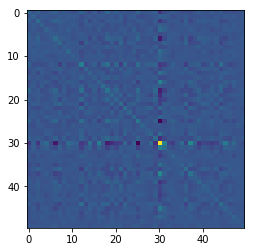

In [8]:
import numpy as np
import matplotlib.pyplot as plt

# Vector of means and cov matrix
mean_vec = np.mean(X, axis=0) #Mean vector along columns
X = X-mean_vec
cov_mat = X.dot(X.T) / (n-1)
print("Plot of covariance matrix:")
plt.clf
plt.imshow(cov_mat);

Plot of correlation matrix:


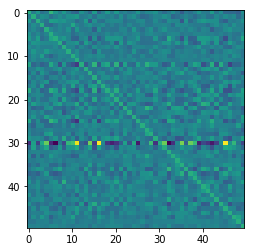

In [9]:
std_dev = np.sqrt(cov_mat[np.diag_indices(dim)])
corr_mat = (1/std_dev)*cov_mat/std_dev
print("Plot of correlation matrix:")
plt.clf
plt.imshow(corr_mat);

In [10]:
eig_vals, eig_vecs = np.linalg.eig(corr_mat)
print('Eigenvalues : \n %s \n' %eig_vals)
print('Eigenvectors: \n %s \n' %eig_vecs)

Eigenvalues : 
 [ 1.14833460e+01+0.0000000e+00j  1.03001490e+01+0.0000000e+00j
  5.33943415e+00+0.0000000e+00j  5.11112690e+00+0.0000000e+00j
  3.26090598e+00+0.0000000e+00j  2.32348657e+00+0.0000000e+00j
  2.18805742e+00+0.0000000e+00j  1.67085171e+00+0.0000000e+00j
  1.35832345e+00+0.0000000e+00j  1.13995445e+00+0.0000000e+00j
  9.87646401e-01+0.0000000e+00j  8.42471778e-01+0.0000000e+00j
  7.40699232e-01+0.0000000e+00j  6.49009526e-01+0.0000000e+00j
  6.02843463e-01+0.0000000e+00j  5.22465229e-01+0.0000000e+00j
  1.00596763e-01+0.0000000e+00j  1.59272701e-01+0.0000000e+00j
  3.71561080e-01+0.0000000e+00j  3.22058439e-01+0.0000000e+00j
  2.79796749e-01+0.0000000e+00j  2.45944217e-01+0.0000000e+00j
  3.63017335e-07+0.0000000e+00j -3.13985680e-07+0.0000000e+00j
 -2.29750313e-07+7.8471327e-09j -2.29750313e-07-7.8471327e-09j
  2.43897375e-07+4.3307291e-09j  2.43897375e-07-4.3307291e-09j
 -1.82999628e-07+0.0000000e+00j  1.76610627e-07+7.5228046e-09j
  1.76610627e-07-7.5228046e-09j -1.4252

Exercice 3:
A more stable version of the SVD consists in using directly numpy.linalg.svd

Form a list of pairs (value, vector) of singular values and associated vectors. This list needs to be sorted from largest to smallest singular value.

### III.2. Computing projection operator and plotting in 2D

Here, one needs to find the matrix projection 
$$ proj: \mathbb{R}^{dim} \rightarrow \mathbb{R}^{2} $$
whose image is spanned by the two first eigenvectors in the SVD decomposition.

Then plot every word vector of the form model[word] after projection. This will give a scatter plot in $\mathbb{R}^2$.

Exercice 4:
Compute projection matrix which will serve in the next bit of code to compute the projection in $\mathbb{R}^2$.

In [22]:
#Ex4: TODO

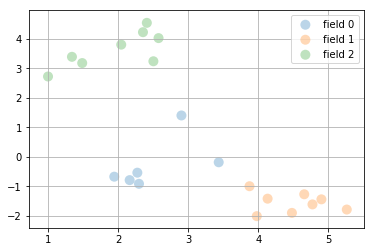

In [18]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
index = 0
for f in fields:
    label = "field %d"%index
    index += 1
    points = [ proj.dot( model[w] ) for w in f]
    x = [ p[0] for p in points]
    y = [ p[1] for p in points]
    ax.scatter(x, y, s = 100, label=label, alpha=0.3, edgecolors='none')
ax.legend()
ax.grid(True)

plt.show()

### III.3. Computing projection operator and plotting in 3D

Exercice 5:
Compute projection matrix for 3D

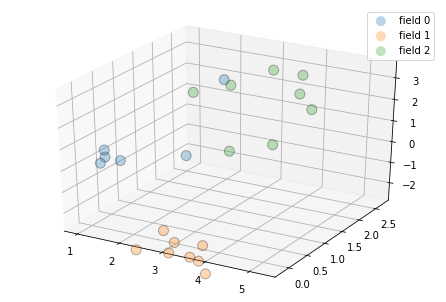

In [19]:
# Ex5: TODO

from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = Axes3D(fig)
plt.clf
index = 0
for f in fields:
    label = "field %d"%index
    index += 1
    points = [ proj.dot( model[w] ) for w in f]
    x = [ p[0] for p in points]
    y = [ p[1] for p in points]
    z = [ p[2] for p in points]
    ax.scatter(x, y, z, s = 100, label=label, alpha=0.3, edgecolors='none')
plt.axis('tight') 
plt.axis('equal')
plt.legend();

In [21]:
import ipyvolume as ipv
import numpy as np

ipv.figure()
index = 0
for f in fields:
    label = "field %d"%index
    index += 1
    points = [ proj.dot( model[w] ) for w in f]
    x = [ p[0] for p in points]
    y = [ p[1] for p in points]
    z = [ p[2] for p in points]
    x = np.array(x)
    y = np.array(y)
    z = np.array(z)
    c = np.random.rand(1, 3)
    ipv.scatter( x, y, z, color=c, size=7, marker="sphere")

ipv.gcc()

# IV. Conclusion

- Instead of training our own model for word embeddings, we have loaded pre-trained models.
- Thanks to computations of cosine similarities, Word embeddings seem to make sense of basic semantic questions such as "Man" is to "King" what "Woman" is to x?
- In order to further understand the topology of word embeddings, we performed a PCA in order to project to 2D and 3D pictures. Clearly, semantic fields tend to cluster.